Github URl : https://github.com/nltr2/Advance-Regression-Assignment-IIITB


In [614]:
## Import the packages and suppress warnings


import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE


## Data Pre-processing

In [615]:
house_df = pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [616]:
house_df.shape

(1460, 81)

In [617]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [618]:
house_df.describe(percentiles=[.25,.5,.75,.90,.95,.98])

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,1314.100000,120.000000,96.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,1387.050000,160.000000,107.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
98%,1430.820000,188.200000,124.000000,25251.620000,9.000000,8.000000,2008.000000,2008.000000,650.980000,1442.640000,...,430.100000,240.820000,235.640000,0.000000,223.640000,0.000000,500.000000,12.000000,2010.000000,394931.060000


In [619]:
# Drop Id column as it does not bear effect

house_df = house_df.drop(['Id'],axis=1)
house_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [620]:
## 

house_null_col = ['Alley','BsmtQual', 'BsmtCond', 'BsmtExposure','BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature','MasVnrType']

for item in house_null_col:
    house_df[item].fillna('None', inplace=True)




In [621]:
house_df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [622]:
# Imputing electrical with mode

house_df['Electrical'].fillna(house_df['Electrical'].mode(), inplace=True)

In [623]:
## imputing other missing values
house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)
house_df["GarageYrBlt"].fillna(house_df["GarageYrBlt"].median(), inplace=True)
house_df["MasVnrArea"].fillna(house_df["MasVnrArea"].median(), inplace=True)

In [624]:
house_numerical_col = house_df.select_dtypes(include=['float64','int64'])
house_numerical_col.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
90%,120.000000,92.000000,14381.700000,8.000000,7.000000,2006.000000,2006.000000,335.000000,1065.500000,117.200000,...,262.000000,130.000000,112.000000,0.000000,0.000000,0.000000,0.000000,10.000000,2010.000000,278000.000000
95%,160.000000,104.000000,17401.150000,8.000000,8.000000,2007.000000,2007.000000,456.000000,1274.000000,396.200000,...,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,11.000000,2010.000000,326100.000000
99%,190.000000,137.410000,37567.640000,10.000000,9.000000,2009.000000,2009.000000,791.280000,1572.410000,830.380000,...,505.460000,285.820000,261.050000,168.000000,268.050000,0.000000,700.000000,12.000000,2010.000000,442567.010000


In [625]:
house_numerical_col.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


In [626]:
house_continuous_cols = list(house_numerical_col)
house_continuous_cols

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [627]:
house_categorical_cols=  [x for x in list(house_df) if x not in house_continuous_cols] 
house_categorical_cols

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [628]:
len(house_categorical_cols)

43

In [629]:
##  remove outliers
for col in house_continuous_cols:
    house_df = house_df.loc[house_df[col] <= np.percentile(house_df[col], 99)]


## 2. Data Visualization

In [630]:
## visualize sales price after taking log as range is very high.

house_df['SalePrice'] = np.log1p(house_df['SalePrice'])


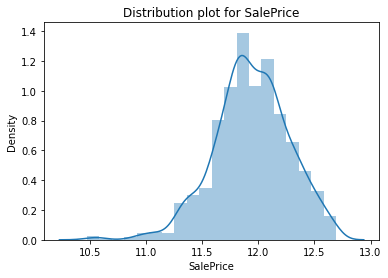

In [631]:

plt.title('Distribution plot for SalePrice')
sns.distplot(house_df['SalePrice'], bins=20)
plt.show()

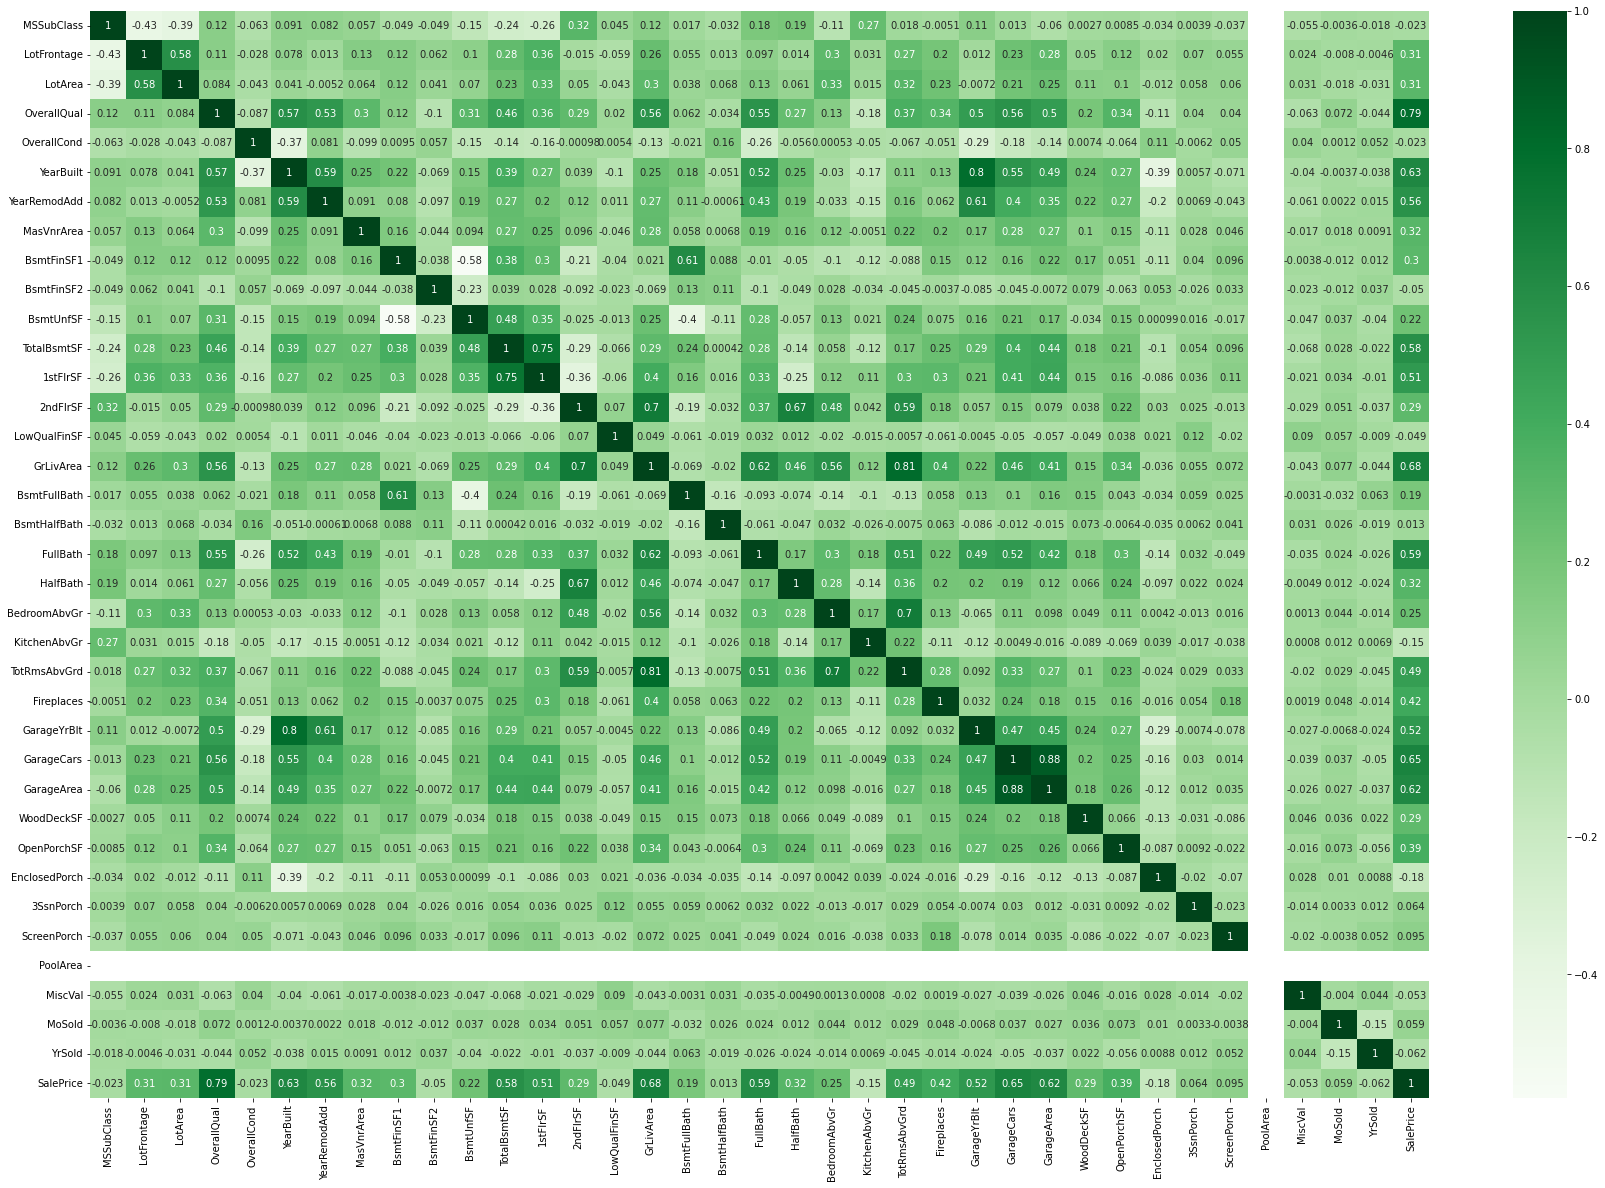

In [632]:

## correlation heatmap 

plt.figure(figsize=(30,20))
sns.heatmap(house_df[house_continuous_cols].corr(), cmap='Greens', annot=True)
plt.show()


- GarageArea and GarageCars show 88% correlation

- TotRmsAbvGrd and GrLivArea show 83% correlation

In [633]:
# Remove correlated cols

house_df.drop(['GarageArea', 'TotRmsAbvGrd'], axis = 1, inplace = True)

- Oridnal value derivation

In [634]:
ordinal_col = ['ExterQual', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 
            'BldgType', 'HouseStyle', 'MasVnrType','LotShape','SaleCondition']

In [635]:
house_df['ExterQual_ord'] = house_df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0 })
house_df['BsmtQual_ord'] = house_df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['BsmtExposure_ord'] = house_df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0})
house_df['BsmtFinType1_ord'] = house_df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1,'None': 0})
house_df['HeatingQC_ord'] = house_df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['KitchenQual_ord'] = house_df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['FireplaceQu_ord'] = house_df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'None': 0})
house_df['BldgType_ord'] = house_df['BldgType'].map({'Twnhs': 5, 'TwnhsE': 4, 'Duplex': 3, '2fmCon': 2, '1Fam': 1,  'None': 0 })
house_df['HouseStyle_ord'] = house_df['HouseStyle'].map({'SLvl': 8, 'SFoyer': 7, '2.5Fin': 6, '2.5Unf': 5, '2Story': 4, '1.5Fin': 3, '1.5Unf': 2, '1Story': 1, 'None': 0 })
house_df['MasVnrType_ord'] = house_df['MasVnrType'].map({'BrkCmn': 1, 'BrkFace': 1, 'CBlock': 1, 'Stone': 1, 'None': 0 })
house_df['SaleCondition_ord'] = house_df['SaleCondition'].map({'Normal': 1, 'Partial': 1, 'Abnorml': 0, 'Family': 0,'Alloca': 0, 'AdjLand': 0, 'None': 0})
house_df['LotShape_ord'] = house_df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})

In [636]:
categorical_col_remaining = [col for col in house_categorical_cols if col not in ordinal_col]

categorical_col_remaining

['MSZoning',
 'Street',
 'Alley',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'ExterCond',
 'Foundation',
 'BsmtCond',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType']

In [637]:
house_df.shape

(1134, 90)

In [638]:
for col in categorical_col_remaining:
    col_dummies = pd.get_dummies(house_df[col], prefix=col, drop_first = True)
    house_df= pd.concat([house_df, col_dummies], axis = 1)



In [639]:
house_df.shape

(1134, 246)

In [640]:
house_df= house_df.drop(house_categorical_cols, axis=1)

In [641]:
house_df.shape

(1134, 203)

- Train Test Split

In [642]:
house_train, house_test = train_test_split(house_df, test_size=0.2, random_state=23)

In [643]:
print(house_train.shape)
print(house_test.shape)

(907, 203)
(227, 203)


In [644]:
## scaling data
## removing removed correlated continuous columns
house_continuous_cols.remove('TotRmsAbvGrd')
house_continuous_cols.remove('GarageArea')
scaler = StandardScaler()
house_train[house_continuous_cols] =scaler.fit_transform(house_train[house_continuous_cols])

house_test[house_continuous_cols] = scaler.transform(house_test[house_continuous_cols])

- Model

In [645]:
y_train = house_train.pop('SalePrice')
X_train = house_train

In [646]:
y_test = house_test.pop('SalePrice')
X_test = house_test

- RFE

In [647]:
lm= LinearRegression()
lm.fit(X_train,y_train)
rfe = RFE(lm,n_features_to_select=150)
rfe.fit(X_train,y_train)


RFE(estimator=LinearRegression(), n_features_to_select=150)

In [648]:
y_train_predict = lm.predict(X_train)
r2_score(y_true=y_train, y_pred=y_train_predict)

0.9235275214357915

In [649]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', True, 1),
 ('LotFrontage', False, 2),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 12),
 ('MasVnrArea', False, 49),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', True, 1),
 ('BsmtHalfBath', False, 46),
 ('FullBath', False, 45),
 ('HalfBath', True, 1),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 36),
 ('Fireplaces', False, 37),
 ('GarageYrBlt', True, 1),
 ('GarageCars', True, 1),
 ('WoodDeckSF', True, 1),
 ('OpenPorchSF', True, 1),
 ('EnclosedPorch', True, 1),
 ('3SsnPorch', False, 35),
 ('ScreenPorch', True, 1),
 ('PoolArea', True, 1),
 ('MiscVal', True, 1),
 ('MoSold', False, 48),
 ('YrSold', True, 1),
 ('ExterQual_ord', False, 47),
 ('BsmtQual_ord', False, 30),
 ('BsmtExposure_ord', True, 1),
 ('BsmtFinTy

- Ridge

In [650]:
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
                    0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
                    4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30, 40, 50, 60, 70,80, 90, 100, 1000 ]}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1
                       )            
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [651]:
model_cv.best_params_

{'alpha': 20}

In [652]:
ridge = Ridge(alpha = 20)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9193230104030329
0.8956248581858526


In [653]:
# top 10 features
ridge_coeffiecients = pd.DataFrame(zip(X_train.columns, ridge.coef_))
ridge_coeffiecients.columns=['Col', 'Coeff']
ridge_coeffiecients.sort_values('Coeff', ascending=False).head(10)

,Col,Coeff
68,Neighborhood_Crawfor,0.234055
15,GrLivArea,0.184181
44,SaleCondition_ord,0.173946
3,OverallQual,0.169523
5,YearBuilt,0.159222
4,OverallCond,0.148316
168,Functional_Typ,0.147467
109,Exterior1st_BrkFace,0.125261
88,Condition1_Norm,0.124928
83,Neighborhood_Somerst,0.116498


- Lasso Regression

In [654]:
lasso = Lasso()
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1) 
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [655]:
model_cv.best_params_

{'alpha': 0.001}

In [656]:
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train,y_train)

y_pred_train = lasso.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9239996330020745
0.8939313759890265


In [657]:
## top 10 lasso coefficients
lasso_coeffiecients = pd.DataFrame(zip(X_train.columns, lasso.coef_))
lasso_coeffiecients.columns=['Col', 'Coeff']
lasso_coeffiecients.sort_values('Coeff', ascending=False).head(10)


,Col,Coeff
68,Neighborhood_Crawfor,0.468026
15,GrLivArea,0.317195
83,Neighborhood_Somerst,0.248279
65,Neighborhood_BrkSide,0.205687
44,SaleCondition_ord,0.201638
5,YearBuilt,0.194262
109,Exterior1st_BrkFace,0.188037
78,Neighborhood_NridgHt,0.176317
145,BsmtCond_None,0.172961
3,OverallQual,0.161721


<AxesSubplot:ylabel='Density'>

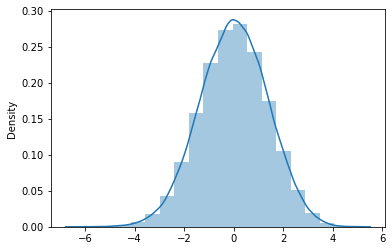

In [658]:
## for ridge
y_train_pred = ridge.predict(X_train)
residuals_ridge = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals_ridge, bins = 20)


<AxesSubplot:ylabel='Density'>

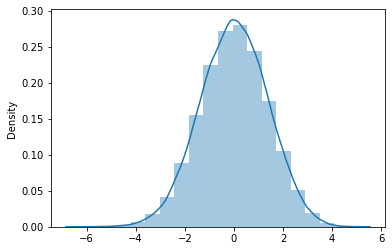

In [659]:
## for lasso

y_train_pred = lasso.predict(X_train)
residuals_lasso = y_train.values - y_train_pred.reshape(-1, 1)
sns.distplot(residuals_lasso, bins = 20)

## Conclusion


-  Best value of alpha for ridge is 20
-  Best value of alpha for lasso is 0.001

#### For Question 1 : doubling the value of alpha

In [660]:
lasso = Lasso(alpha = 0.002)
lasso.fit(X_train,y_train)

y_pred_train = lasso.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = lasso.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.917078506507462
0.8984228466486353


In [661]:
lasso_coeffiecients = pd.DataFrame(zip(X_train.columns, lasso.coef_))
lasso_coeffiecients.columns=['Col', 'Coeff']
lasso_coeffiecients.sort_values('Coeff', ascending=False).head(10).Col

68     Neighborhood_Crawfor
15                GrLivArea
83     Neighborhood_Somerst
5                 YearBuilt
44        SaleCondition_ord
109     Exterior1st_BrkFace
3               OverallQual
65     Neighborhood_BrkSide
4               OverallCond
168          Functional_Typ
Name: Col, dtype: object

In [662]:
ridge = Ridge(alpha = 40)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.9139612250069122
0.8967355836930018


In [663]:
ridge_coeffiecients = pd.DataFrame(zip(X_train.columns, ridge.coef_))
ridge_coeffiecients.columns=['Col', 'Coeff']
ridge_coeffiecients.sort_values('Coeff', ascending=False).head(10).Col

15                GrLivArea
3               OverallQual
68     Neighborhood_Crawfor
44        SaleCondition_ord
4               OverallCond
5                 YearBuilt
168          Functional_Typ
12                 1stFlrSF
88          Condition1_Norm
11              TotalBsmtSF
Name: Col, dtype: object

#### Quesion number 3

In [664]:
features_tobe_removed = ['SaleCondition_ord', 'Neighborhood_BrkSide', 'Neighborhood_Somerst', 'GrLivArea', 'Neighborhood_Crawfor']
X_train.drop(features_tobe_removed, axis=1, inplace=True)
X_test.drop(features_tobe_removed, axis=1, inplace=True)



In [665]:
lasso = Lasso()

model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 33 candidates, totalling 165 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 30,
                                   40, 50, 60, 70, 80, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [666]:
lasso = Lasso(alpha=model_cv.best_params_['alpha'])
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [667]:
lasso_coeffiecients = pd.DataFrame(zip(X_train.columns, lasso.coef_))
lasso_coeffiecients.columns=['Col', 'Coeff']
lasso_coeffiecients.sort_values('Coeff', ascending=False).head(5).Col

13       2ndFlrSF
3     OverallQual
5       YearBuilt
12       1stFlrSF
4     OverallCond
Name: Col, dtype: object